
전력 사용량 예측 AI 경진대회
--

전력 | 한국에너지공단 | 시계열 | SMAPE
--

train.csv : train 데이터 : 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터 1시간 단위로 제공 전력사용량(kWh) 포함 train.shape: (122400, 10)

test.csv : test 데이터 : 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터 3시간 단위로 제공(강수량의 경우 6시간 단위로 제공, 예보데이터) 전력사용량(kWh) 미포함 test.shape: (10080, 9)

sample_submission.csv : sample_submission 데이터 sample_submission.shape: (10080, 2)

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import io
import pandas as pd

train=pd.read_csv('train.csv', encoding='cp949', parse_dates=['date_time'])
test=pd.read_csv('test.csv', encoding='cp949', parse_dates=['date_time'])
sample_submission=pd.read_csv('sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'] )

In [ ]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test) 
df_sample_submission=pd.DataFrame(sample_submission)

시간칼럼 분류
--

In [ ]:
df_train['time'] = df_train['date_time'].dt.strftime('%m%d%H')
df_train['month_day'] = df_train['date_time'].dt.strftime('%m%d')
df_train['month']=df_train['date_time'].dt.strftime('%m')
df_train['date']=df_train['date_time'].dt.strftime('%d')
df_train['hour']=df_train['date_time'].dt.strftime('%H')
df_train['day']=df_train['date_time'].dt.strftime('%A')

df_test['time'] = df_test['date_time'].dt.strftime('%m%d%H')
df_test['month_day'] = df_test['date_time'].dt.strftime('%m%d')
df_test['month']=df_test['date_time'].dt.strftime('%m')
df_test['date']=df_test['date_time'].dt.strftime('%d')
df_test['hour']=df_test['date_time'].dt.strftime('%H')
df_test['day']=df_test['date_time'].dt.strftime('%A')

In [ ]:
tn_month_day=pd.Series(df_train['month_day'], dtype=int)
tn_month=pd.Series(df_train['month'], dtype=int)
tn_date=pd.Series(df_train['date'], dtype=int)
tn_hour=pd.Series(df_train['hour'], dtype=int)
tn_time=pd.Series(df_train['time'], dtype=int)

te_month_day=pd.Series(df_test['month_day'], dtype=int)
te_month=pd.Series(df_test['month'], dtype=int)
te_date=pd.Series(df_test['date'], dtype=int)
te_hour=pd.Series(df_test['hour'], dtype=int)
te_time=pd.Series(df_test['time'], dtype=int)

df_train['month_day'] =tn_month_day
df_train['month']=tn_month
df_train['date']=tn_date
df_train['hour']=tn_hour
df_train['time']=tn_time

df_test['month_day']=te_month_day
df_test['month']=te_month
df_test['date']=te_date
df_test['hour']=te_hour
df_test['time']=te_time

Day 정렬

In [ ]:
from pandas.api.types import CategoricalDtype

cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

cat_type=CategoricalDtype(categories=cats, ordered=True)

df_train['day']=df_train['day'].astype(cat_type)
df_test['day']=df_test['day'].astype(cat_type)

EDA
--

1. 시간과 전력사용량 관계

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'month')]

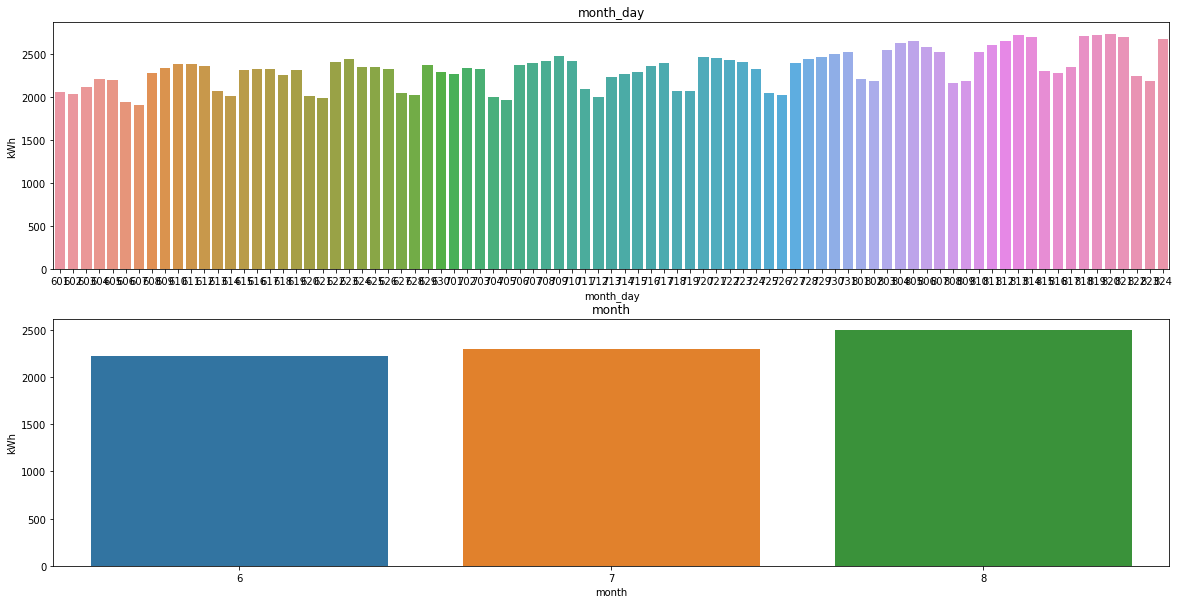

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,10)

md=df_train.groupby('month_day')['전력사용량(kWh)'].mean().reset_index()
m=df_train.groupby('month')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=md, x="month_day", y='전력사용량(kWh)', ax=ax1)

sns.barplot(data=m, x="month", y='전력사용량(kWh)', ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='kWh', title ="month_day")
ax2.set(ylabel='kWh', title ="month")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'hour')]

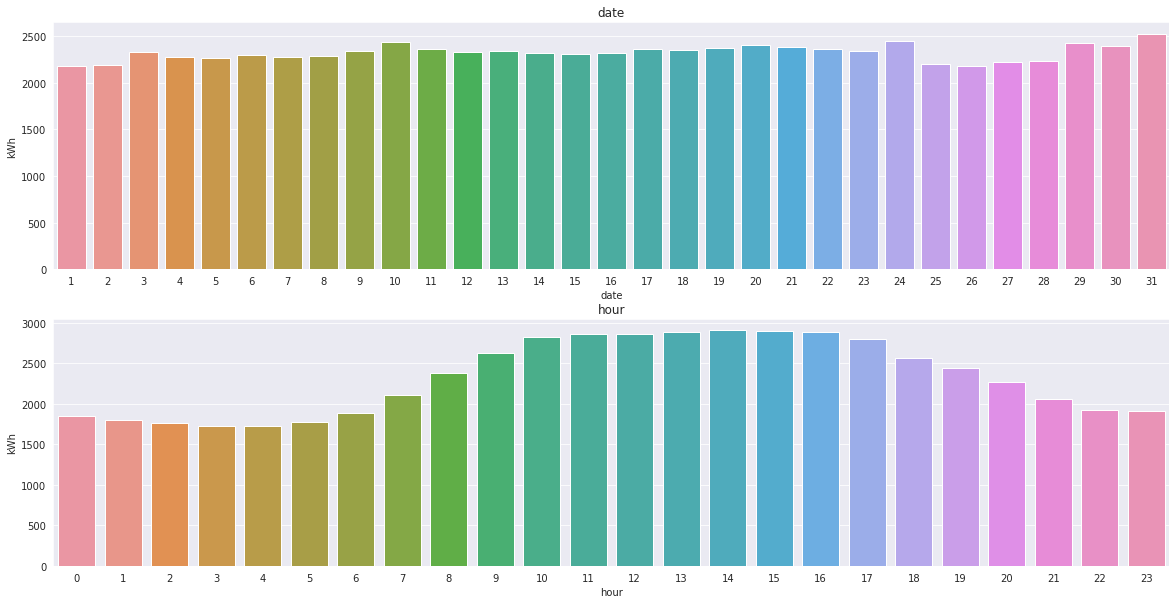

In [ ]:
import seaborn as sns

figure, ( (ax3), (ax4)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,10)

date=df_train.groupby('date')['전력사용량(kWh)'].mean().reset_index()
h=df_train.groupby('hour')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=date, x="date", y='전력사용량(kWh)', ax=ax3)

sns.barplot(data=h, x="hour", y='전력사용량(kWh)', ax=ax4)

ax3.set(ylabel='kWh', title ="date")
ax4.set(ylabel='kWh', title ="hour")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'day')]

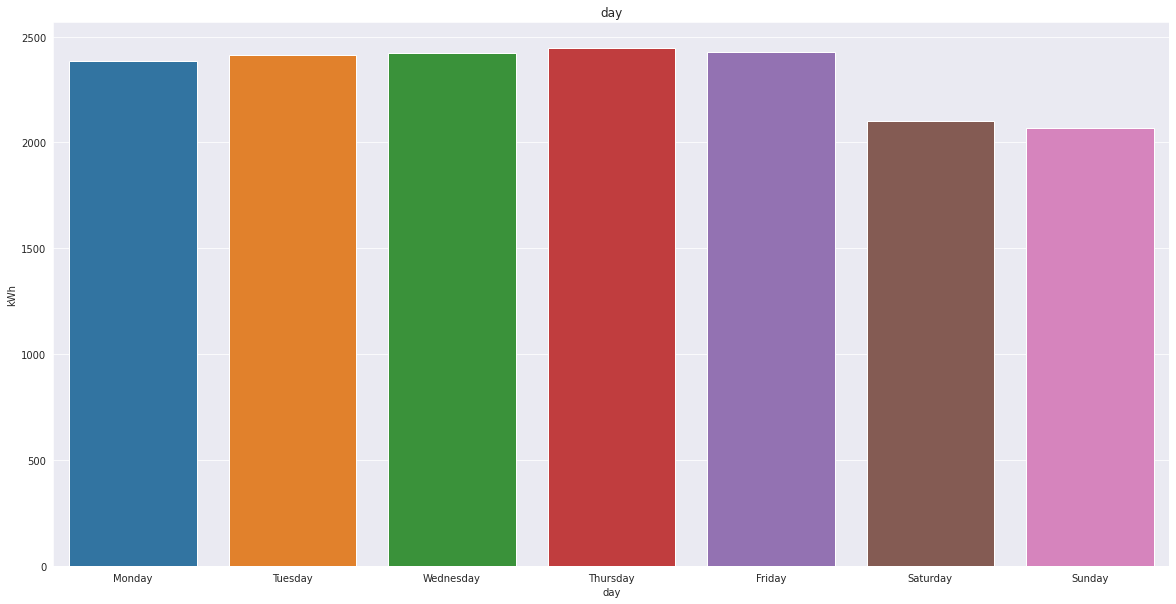

In [ ]:
import seaborn as sns

figure, (ax5) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

day=df_train.groupby('day')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=day, x="day", y='전력사용량(kWh)', ax=ax5)

sns.set_style("darkgrid")
ax5.set(ylabel='kWh', title ="day")

건물번호와 전력사용량 관계
--

In [ ]:
building_num=df_train.groupby(['num'])['전력사용량(kWh)'].sum().reset_index()

[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'num and kWh')]

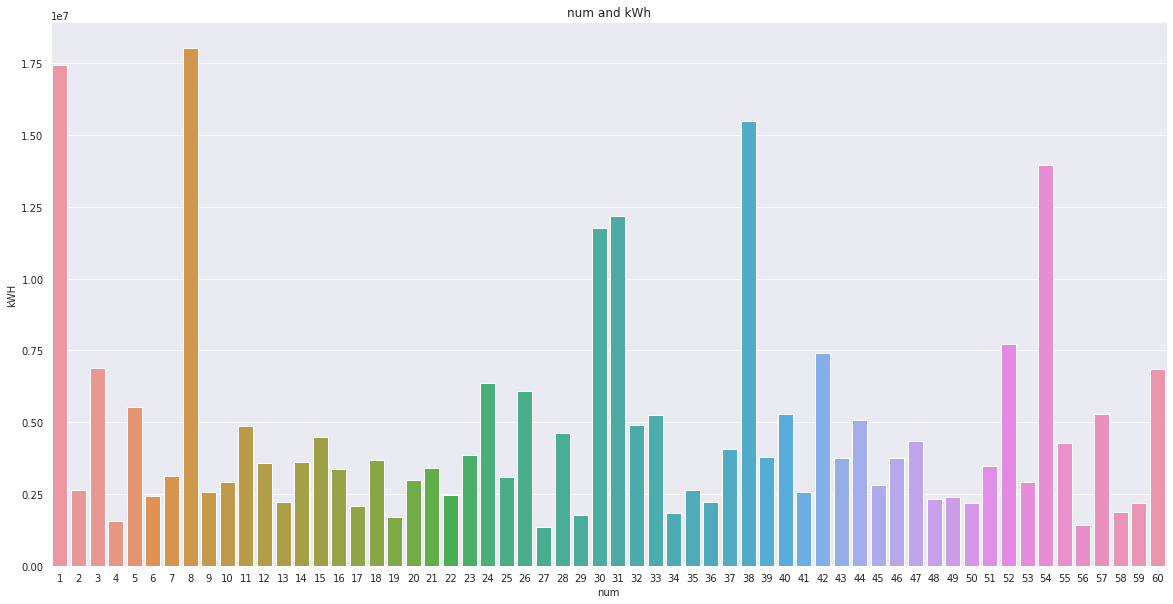

In [ ]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

sns.barplot(data=building_num, x='num', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='num and kWh')

- 8번 건물이 가장 전력을 많이 사용하였습니다.

모델에 적용할 데이터 가공하기
--

In [ ]:
fb_train=df_train.groupby(['num','month_day','date_time' ])['전력사용량(kWh)'].sum().reset_index()

In [ ]:
fb_train['ds']=fb_train['date_time']
fb_train['y']=fb_train['전력사용량(kWh)']

In [ ]:
fb_train

,num,month_day,date_time,전력사용량(kWh),ds,y
0,1,601,2020-06-01 00:00:00,8179.056,2020-06-01 00:00:00,8179.056
1,1,601,2020-06-01 01:00:00,8135.640,2020-06-01 01:00:00,8135.640
2,1,601,2020-06-01 02:00:00,8107.128,2020-06-01 02:00:00,8107.128
3,1,601,2020-06-01 03:00:00,8048.808,2020-06-01 03:00:00,8048.808
4,1,601,2020-06-01 04:00:00,8043.624,2020-06-01 04:00:00,8043.624
...,...,...,...,...,...,...
122395,60,824,2020-08-24 19:00:00,4114.368,2020-08-24 19:00:00,4114.368
122396,60,824,2020-08-24 20:00:00,3975.696,2020-08-24 20:00:00,3975.696
122397,60,824,2020-08-24 21:00:00,3572.208,2020-08-24 21:00:00,3572.208
122398,60,824,2020-08-24 22:00:00,3299.184,2020-08-24 22:00:00,3299.184


In [ ]:
fb_train.drop(['date_time','전력사용량(kWh)'], axis=1, inplace=True)

In [ ]:
fb_train

,num,month_day,ds,y
0,1,601,2020-06-01 00:00:00,8179.056
1,1,601,2020-06-01 01:00:00,8135.640
2,1,601,2020-06-01 02:00:00,8107.128
3,1,601,2020-06-01 03:00:00,8048.808
4,1,601,2020-06-01 04:00:00,8043.624
...,...,...,...,...
122395,60,824,2020-08-24 19:00:00,4114.368
122396,60,824,2020-08-24 20:00:00,3975.696
122397,60,824,2020-08-24 21:00:00,3572.208
122398,60,824,2020-08-24 22:00:00,3299.184


In [ ]:
fb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   num        122400 non-null  int64         
 1   month_day  122400 non-null  int64         
 2   ds         122400 non-null  datetime64[ns]
 3   y          122400 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.7 MB


8/24~8/31 전력사용량 예측
--

Train데이터에 마지막 7일을 test 데이터로 지정하여 결과 비교해보기
--

In [ ]:
fb_train_tn=fb_train.loc[fb_train['month_day']<818]

In [ ]:
fb_train_te=fb_train.loc[fb_train['month_day']>=818]

In [ ]:
fb_train.columns

Index(['num', 'month_day', 'ds', 'y'], dtype='object')

In [ ]:
y_test=fb_train_te['y']

실제 시간에 따른 건물들의 전력량 보기

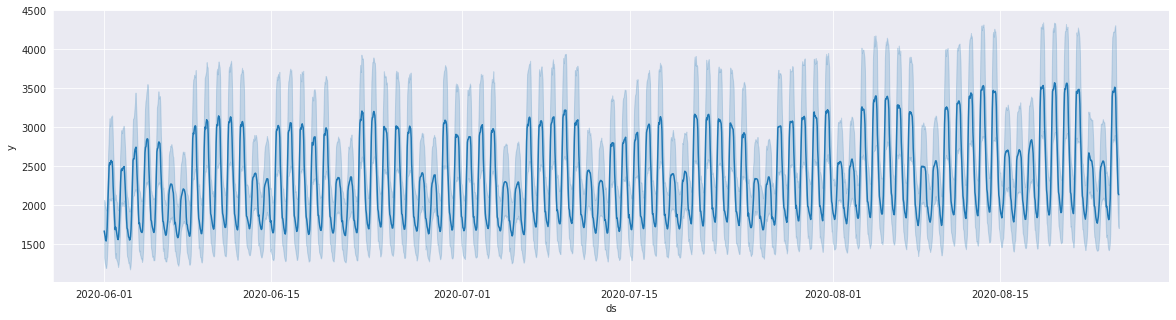

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
sns.lineplot(x=fb_train.ds, y=fb_train.y, data=fb_train)

Prophet 불러오기
--
rmse 는 465.54035716912716 입니다.

기본 모델로 예측해보기

채점 방식:SMAPE

In [ ]:
import numpy as np
def smape(a, f):
    return 1/len(a)*np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)

In [ ]:
from fbprophet import Prophet

In [ ]:
answer=[]

for i in range(1,61):
    fb_1=fb_train_tn.loc[fb_train_tn['num']==i]
    model=Prophet()
    model.fit(fb_1)
    future=model.make_future_dataframe(periods=168, freq='H')
    forecast=model.predict(future)
    pred=forecast['yhat']
    answer.append(pred)
    i+=1


In [ ]:
import numpy as np

answer2=pd.DataFrame(answer)
answer3=answer2.iloc[:, 1872:2040]
answer4=np.array(answer3)
answer5=answer4.reshape(-1,1)
answer6=pd.DataFrame(answer5)

In [ ]:
df_sample_submission['answer']=answer6[0]

In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred=df_sample_submission['answer']
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
score=smape(y_test, y_test_pred)

print('rmse 는', format(rmse), '입니다.')
print('smape는', format(score), '입니다.')

rmse 는 465.54035716912716 입니다.
smape는 5.6959248645253 입니다.


모델 시각화
--

8번 건물이 가장 전력사용량이 많으므로, 8번 회사를 기준으로 시각화를 해보겠습니다.

In [ ]:
fb_8=fb_train_tn.loc[fb_train_tn['num']==8]
model=Prophet()
model.fit(fb_8)
future=model.make_future_dataframe(periods=168, freq='H')
forecast=model.predict(future)

모델이 예측한 값

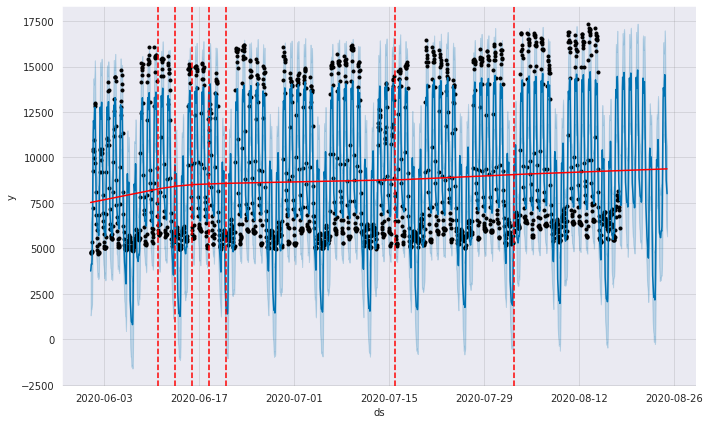

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)

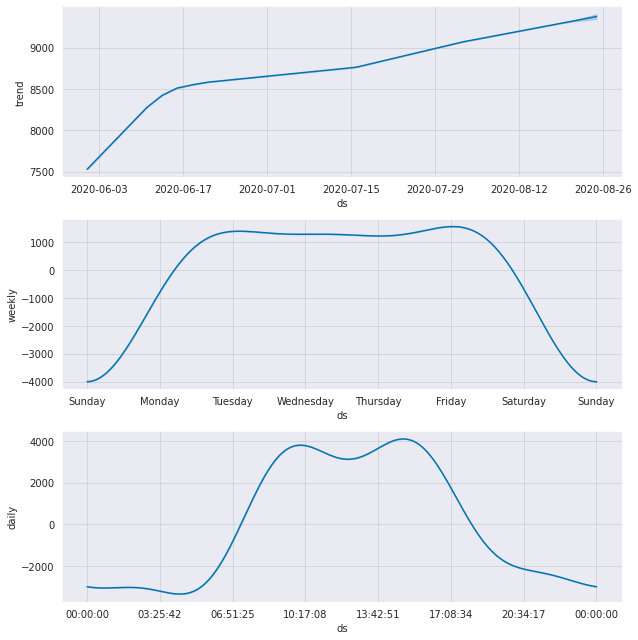

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_components_plotly(model, forecast)

실제 8번 건물의 데이터

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'hour')]

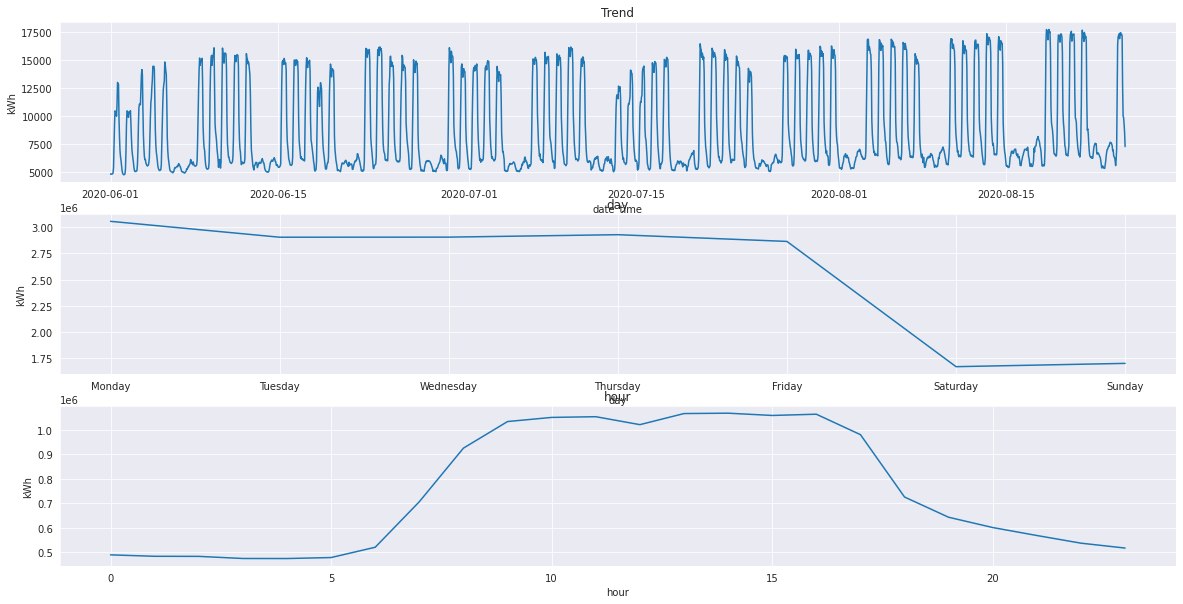

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fb_8=df_train.loc[df_train['num']==8]

figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,10)

md=fb_8.groupby('date_time')['전력사용량(kWh)'].sum().reset_index()
d=fb_8.groupby('day')['전력사용량(kWh)'].sum().reset_index()
h=fb_8.groupby('hour')['전력사용량(kWh)'].sum().reset_index()

sns.lineplot(data=md, x="date_time", y='전력사용량(kWh)', ax=ax1)

sns.lineplot(data=d, x="day", y='전력사용량(kWh)', ax=ax2)

sns.lineplot(data=h, x="hour", y='전력사용량(kWh)', ax=ax3)

sns.set_style("darkgrid")
ax1.set(ylabel='kWh', title ="Trend")

ax2.set(ylabel='kWh', title ="day")

ax3.set(ylabel='kWh', title ="hour")

모델이 예측한 8번 회사의 2020년 8월 19일부터 2020년 8월 24일까지 전력사용량

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

실제 8번 건물의 2020년 8월 19일부터 2020년 8월 24일까지 전력사용량

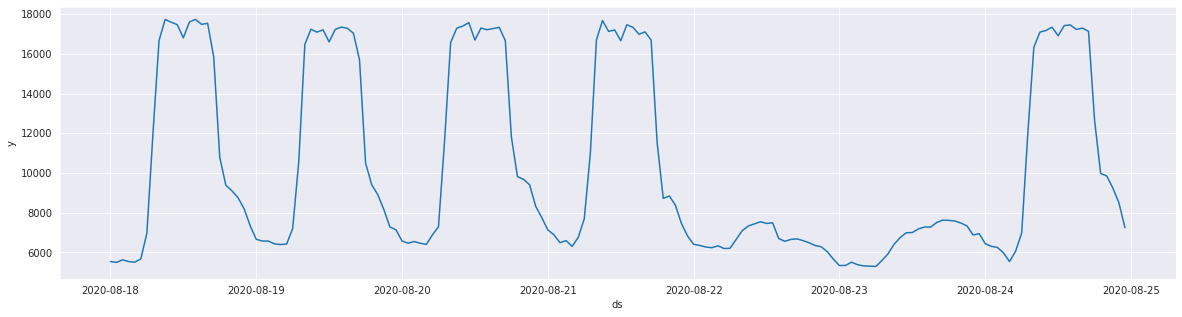

In [ ]:
fb_8t=fb_train_te.loc[fb_train_te['num']==8]

plt.figure(figsize=(20,5))
sns.lineplot(x=fb_8t.ds, y=fb_8t.y, data=fb_8t)

하이퍼 파라미터 없이 fbprophet을 적용해보았을 때, 
오차를 발견할 수 있다. 오차를 하이퍼파라미터를 통해 줄여보는 것
을 목표로 하이퍼 파라미터를 적용할 필요가 있다.

하이퍼 파라미터 적용하기
--

1. growth = logisitic or linear 설정
2. changepoint_range로 범위 조정
3. changepoint_prior_scale(default: 0.05)로 변동점을 찾는 유동성 변경
( 하이퍼 파라미터의 값을 올리면 좀 더 유동적으로 찾으나, 너무 높으면, 데이터에 오버피팅 우려가 있고, 너무 낮으면, 언더피팅의 우려가 있음.)

4.  변동점의 숫자를 정하고 싶으면 n_changepoints 파라미터 숫자를 바꾸면 됨.

5. 계절성의 조정: yearly_seasonality, weekly_seasonality,
daily_seasonality
(이 값을 올리면 계절성의 fitting이 더 복잡해짐. default=10)

6. seasonality_mode = multiplicative로 설정하면
 좀 더 데이터에 맞는 모델이 구축 됨.
 (default: additive)

7. seasonality_prior_scale: 전체 데이터에서의 계절성의 영향도를 조정하는 파라미터로 값을 낮추면, 계절성의 영향도를 낮출 수 있다. (default=10)


hyper parametergrid ver1.
--

8번 건물 기준 결과
--

params_grid={'growth':['linear'],

'changepoint_range':[0.001,0.01,0.1],

'changepoint_prior_scale':[0.01,0.05,0.1,0.3,0.5], 

'seasonality_mode':["additive","multiplicative" ],

 'weekly_seasonality':[5,10,15,20,30]}

MAPE: 9.064914


'changepoint_prior_scale': 0.05,

'changepoint_range': 0.01,

'growth': 'linear',

'seasonality_mode': 'multiplicative',

'weekly_seasonality': 30}

hyper parametergrid ver2.
--

params_grid={'changepoint_range':[0.005,0.01,0.015],

'changepoint_prior_scale':[0.03,0.04,0.05,0.06,0.07], 

 'weekly_seasonality':[25,30,35,40,45,50]}             


MAPE: 9.060856

{'changepoint_prior_scale': 0.04,

 'changepoint_range': 0.01,

 'weekly_seasonality': 30}

hyper parametergrid ver3.
--

params_grid={'changepoint_range':[0.009,0.01,0.011],

'changepoint_prior_scale':[0.038,0.039,0.040,0.041,0.0042], 

 'weekly_seasonality':[28,29,30,31,32]}             

MAPE: 8.890771

 {'changepoint_prior_scale': 0.0042,
 'changepoint_range': 0.009,
 'weekly_seasonality': 32}

hyper parametergrid ver4.
--

params_grid={'changepoint_range':[0.008,0.0085,0.009],

'changepoint_prior_scale':[0.001,0.002,0.003,0.0042], 

 'weekly_seasonality':[32,33,34]}    

MAPE: 8.328244

 {'changepoint_prior_scale': 0.001,
 'changepoint_range': 0.0085,
 'weekly_seasonality': 34}


 hyper parametergrid ver5.
--

params_grid={'changepoint_range':[0.0084,0.0085,0.0086],

'changepoint_prior_scale':[0.0009,0.001,0.0011], 

 'weekly_seasonality':[32,33,34]}    

 MAPE: 8.328244
 

 
{'changepoint_prior_scale': 0.001,
 'changepoint_range': 0.0084,
 'weekly_seasonality': 34}


In [ ]:
import numpy as np
def smape(a, f):
    return 1/len(a)*np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)

In [ ]:
fb_parameters=pd.read_csv('fb_parameters.csv', encoding='cp949')
fb_parametrs=pd.DataFrame(fb_parameters)
fb_parameters

,NUM,SMAPE,changepoint_range,changepoint_prior_scale,weekly_seasonality
0,1.0,0.661548,0.0085,0.001,30.0
1,2.0,5.617277,0.0100,0.005,35.0
2,3.0,2.394675,0.0150,0.001,33.0
3,4.0,20.061418,0.0100,0.001,30.0
4,5.0,9.485224,0.0085,0.001,33.0
5,6.0,10.769711,0.0100,0.001,30.0
6,7.0,11.618060,0.0085,0.001,35.0
7,8.0,9.387727,0.0100,0.001,30.0
8,9.0,2.756918,0.0150,0.001,33.0
9,10.0,14.778206,0.0085,0.001,30.0


8번 건물 grid search해보기

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

params_grid={'changepoint_prior_scale':[0.001,0.005],
             'changepoint_range':[0.0085,0.01,0.015]}

grid=ParameterGrid(params_grid)
print([p for p in grid])

[{'changepoint_prior_scale': 0.001, 'changepoint_range': 0.0085}, {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.01}, {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.015}, {'changepoint_prior_scale': 0.005, 'changepoint_range': 0.0085}, {'changepoint_prior_scale': 0.005, 'changepoint_range': 0.01}, {'changepoint_prior_scale': 0.005, 'changepoint_range': 0.015}]


In [ ]:
cnt=0
for p in grid:
    cnt=cnt+1
print(cnt)

6


In [ ]:
import numpy as np

In [ ]:
fb_parameters=pd.1DataFrame(columns=['NUM','SMAPE','changepoint_range','changepoint_prior_scale',
                                     'weekly_seasonality'])


for i in range(1,61):
    fb_1=fb_train_tn.loc[fb_train_tn['num']==i]
    fb_2=fb_1.drop(['num','month_day'], axis=1)
    fb_3=fb_train_te.loc[fb_train_te['num']==i]
    model_parameters=pd.DataFrame(columns=['NUM','SMAPE','changepoint_range','changepoint_prior_scale',
                                      'weekly_seasonality'])
    for p in grid:
        test=pd.DataFrame()
        print(p)
        train_model=Prophet(growth='linear', changepoints=None, seasonality_mode='multiplicative',
                         changepoint_range=p['changepoint_range'],
                         changepoint_prior_scale=p['changepoint_prior_scale'],
                         weekly_seasonality=int(best_parameters2.iloc[i-1][4]))

        train_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        train_model.add_country_holidays(country_name='KR')
        train_model.fit(fb_2, algorithm='LBFGS')
        train_future=train_model.make_future_dataframe(periods=168, freq='H')
        train_forecast=train_model.predict(train_future)
        test=train_forecast[['ds','yhat']]
        test=test.iloc[1872:2040]
        Actual=fb_3['y']
    
        y_true=np.array(Actual)
        y_pred=np.array((test['yhat']))

        score=smape(y_true, y_pred)

        model_parameters=model_parameters.append({'NUM':i, 'SMAPE':score,
                                            'changepoint_range':p['changepoint_range'],
                                            'changepoint_prior_scale':p['changepoint_prior_scale'],
                                            'weekly_seasonality':best_parameters2.iloc[i-1][4]}, ignore_index=True)
        
    parameters = model_parameters.sort_values(by=['SMAPE'])
    parameters = parameters.reset_index(drop=True)
    fb_parameters=fb_parameters.append({'NUM':parameters['NUM'][0],
                                        'SMAPE':parameters['SMAPE'][0],
                                        'changepoint_range':parameters['changepoint_range'][0],
                                        'changepoint_prior_scale':parameters['changepoint_prior_scale'][0],
                                        'weekly_seasonality':parameters['weekly_seasonality'][0]}, ignore_index=True)
    i+=1

#WARNING:fbprophet.models:Optimization terminated abnormally. Falling back to Newton.

In [ ]:
fb_parameters.SMAPE.mean()

8.944713543532655

In [ ]:
#fb_parameters.to_csv('fb_parameters.csv', index=False)

In [ ]:
 #fb_1=fb_train.loc[fb_train['num']==i]
 #   model = Prophet(growth="linear", changepoints=None, weekly_seasonality=20,changepoint_range=0.01 )
 #   # Specifying Custom Seasonalities
 #   model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
 #   model.add_country_holidays(country_name='KR')
 #   
 #   model.fit(fb_1)
 #   future=model.make_future_dataframe(periods=168, freq='H')
 #   forecast=model.predict(future)


In [ ]:

#    fb_1=fb_train_tn.loc[fb_train_tn['num']==8]
#    model = Prophet(growth="linear", changepoints=None, changepoint_range=0.5, 
#                n_changepoints=25, changepoint_prior_scale=0.5, 
#                seasonality_mode="multiplicative",
#                seasonality_prior_scale=5,
#                interval_width=0.99,
#                mcmc_samples=300,
#                yearly_seasonality="auto", 
#                weekly_seasonality="auto", 
#                daily_seasonality=False,
#                holidays=None)
#
#    # Specifying Custom Seasonalities
#    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#    model.add_country_holidays(country_name='KR')
#
#    model.fit(fb_1)
#    future=model.make_future_dataframe(periods=168, freq='H')
#    forecast=model.predict(future)
#    pred=forecast['yhat']
#    answer.append(pred)
#    i+=1

In [ ]:
# EDA 과정에서 보았듯이, 전체적으로 month_day, month, hour, date에 따라 변화가 있다. 이를 하이퍼파라미터에 적용해준다.
#fb_8=fb_train_tn.loc[fb_train_tn['num']==8]
#model = Prophet(growth="linear", changepoints=None, 
#                weekly_seasonality=34,changepoint_range=0.0085, changepoint_prior_scale=0.001,
#                seasonality_mode="multiplicative")
#
# Specifying Custom Seasonalities
#model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#model.add_country_holidays(country_name='KR')
#
#model.fit(fb_8)
#future=model.make_future_dataframe(periods=168, freq='H')
#forecast=model.predict(future)

hyper parameter 적용
--

8번 건물을 기준으로 잡았을 시

rmse 는 338.9836350231947 입니다.

smape는 5.493914207552665 입니다.

Prophet
(growth="linear",

 changepoints=None, 
                
weekly_seasonality=34,

changepoint_range=0.0085, 

changepoint_prior_scale=0.001,
               
seasonality_mode="multiplicative")


각 건물별로 맞출시

rmse 는 339.5457439314311 입니다.

smape는 5.488375960675033 입니다.

범주형 hyper parameter: 

In [ ]:
fb_parameters.head()

,NUM,SMAPE,changepoint_range,changepoint_prior_scale,weekly_seasonality
0,1.0,0.661548,0.0085,0.001,30.0
1,2.0,5.617277,0.0100,0.005,35.0
2,3.0,2.394675,0.0150,0.001,33.0
3,4.0,20.061418,0.0100,0.001,30.0
4,5.0,9.485224,0.0085,0.001,33.0


In [ ]:
fb_parameters.loc[fb_parameters.SMAPE>=10]

,NUM,SMAPE,changepoint_range,changepoint_prior_scale,weekly_seasonality
3,4.0,20.061418,0.0100,0.001,30.0
5,6.0,10.769711,0.0100,0.001,30.0
6,7.0,11.618060,0.0085,0.001,35.0
9,10.0,14.778206,0.0085,0.001,30.0
10,11.0,17.671810,0.0150,0.001,35.0
11,12.0,11.789712,0.0085,0.005,30.0
17,18.0,12.492003,0.0085,0.005,38.0
18,19.0,14.166897,0.0150,0.001,25.0
19,20.0,10.431212,0.0100,0.001,30.0
21,22.0,10.618319,0.0085,0.001,30.0


In [ ]:
fb_parameters.iloc[0][1]

0.6615480782157128

In [ ]:
answer=[]

for i in range(1,61):
    fb_1=fb_train_tn.loc[fb_train_tn['num']==i]
    model = Prophet(growth="linear", changepoints=None, seasonality_mode="multiplicative", 
                    changepoint_range=fb_parameters.iloc[i-1][2],
                    changepoint_prior_scale=fb_parameters.iloc[i-1][3],
                    weekly_seasonality=int(fb_parameters.iloc[i-1][4]))
    
    # Specifying Custom Seasonalities
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_country_holidays(country_name='KR')
    
    model.fit(fb_1, algorithm='LBFGS')
    future=model.make_future_dataframe(periods=168, freq='H')
    forecast=model.predict(future)

    pred=forecast['yhat']
    answer.append(pred)
    i+=1

In [ ]:
import numpy as np

answer2=pd.DataFrame(answer)
answer3=answer2.iloc[:, 1872:2040]
answer4=np.array(answer3)
answer5=answer4.reshape(-1,1)
answer6=pd.DataFrame(answer5)

In [ ]:
df_sample_submission['answer']=answer6[0]

In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred=df_sample_submission['answer']
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
score=smape(y_test, y_test_pred)

print('rmse 는', format(rmse), '입니다.')
print('smape는', format(score), '입니다.')

rmse 는 339.5457439314311 입니다.
smape는 5.488375960675033 입니다.


Neural Prophet
--

In [ ]:
#pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
fb_train_tn.drop(['month_day'], axis=1, inplace=True)

In [ ]:
fb_train_tn

,num,ds,y
0,1,2020-06-01 00:00:00,8179.056
1,1,2020-06-01 01:00:00,8135.640
2,1,2020-06-01 02:00:00,8107.128
3,1,2020-06-01 03:00:00,8048.808
4,1,2020-06-01 04:00:00,8043.624
...,...,...,...
122227,60,2020-08-17 19:00:00,4261.248
122228,60,2020-08-17 20:00:00,4202.064
122229,60,2020-08-17 21:00:00,4036.608
122230,60,2020-08-17 22:00:00,3850.416


In [ ]:
fb_train_te

,num,month_day,ds,y
1872,1,818,2020-08-18 00:00:00,8690.976
1873,1,818,2020-08-18 01:00:00,8672.184
1874,1,818,2020-08-18 02:00:00,8645.616
1875,1,818,2020-08-18 03:00:00,8583.408
1876,1,818,2020-08-18 04:00:00,8562.672
...,...,...,...,...
122395,60,824,2020-08-24 19:00:00,4114.368
122396,60,824,2020-08-24 20:00:00,3975.696
122397,60,824,2020-08-24 21:00:00,3572.208
122398,60,824,2020-08-24 22:00:00,3299.184


In [ ]:
answer=[]

for i in range(1,61):
    fb_1=fb_train_tn.loc[fb_train_tn['num']==i]
    fb_2=fb_1.drop(['num'], axis=1)
    model=NeuralProphet()
    model.fit(fb_2, freq='H')
    future=model.make_future_dataframe(fb_2, periods=168)
    forecast=model.predict(future)
    pred=forecast['yhat1']
    answer.append(pred)
    i+=1

In [ ]:
import numpy as np

answer2=pd.DataFrame(answer)
answer3=np.array(answer2)
answer4=answer3.reshape(-1,1)
answer5=pd.DataFrame(answer4)

In [ ]:
df_sample_submission['answer']=answer5[0]

In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred=df_sample_submission['answer']
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
score=smape(y_test, y_test_pred)

print('rmse 는', format(rmse), '입니다.')
print('smape는', format(score), '입니다.')

rmse 는 463.233580586694 입니다.
smape는 5.660951211473519 입니다.


모델 시각화
--

8번 건물이 가장 전력사용량이 많으므로, 8번 건물을 기준으로 시각화를 해보겠습니다.

- 모델이 예측한 8번 건물의 8/18일 이전 데이터

In [ ]:
fb_8=fb_train_tn.loc[fb_train_tn['num']==8]
fb_81=fb_8.drop(['num'], axis=1)
model=NeuralProphet()
model.fit(fb_81, freq='H')
future=model.make_future_dataframe(fb_81, periods=168)
forecast=model.predict(future)

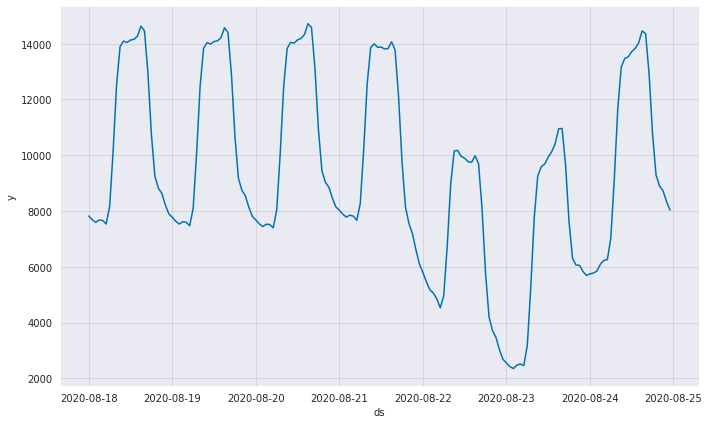

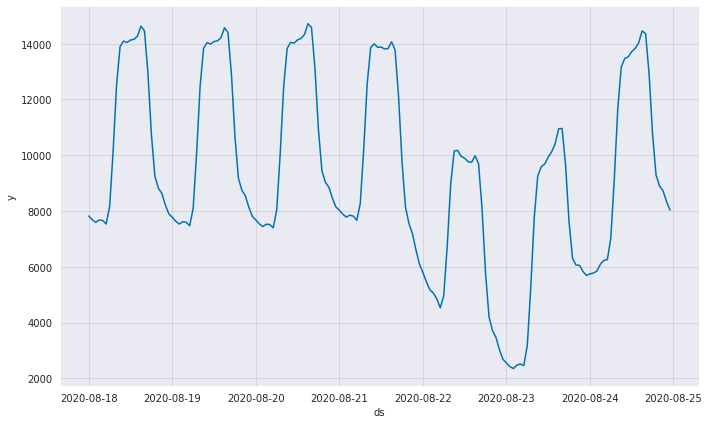

In [ ]:
model.plot(forecast)

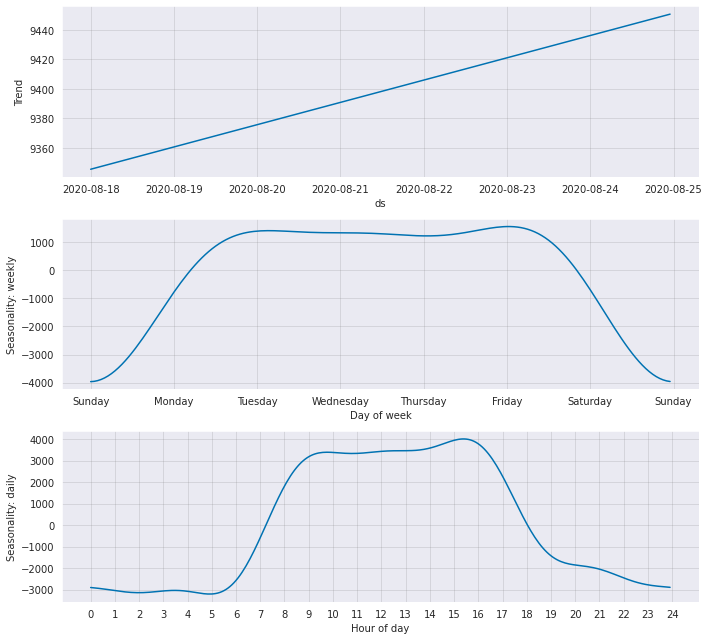

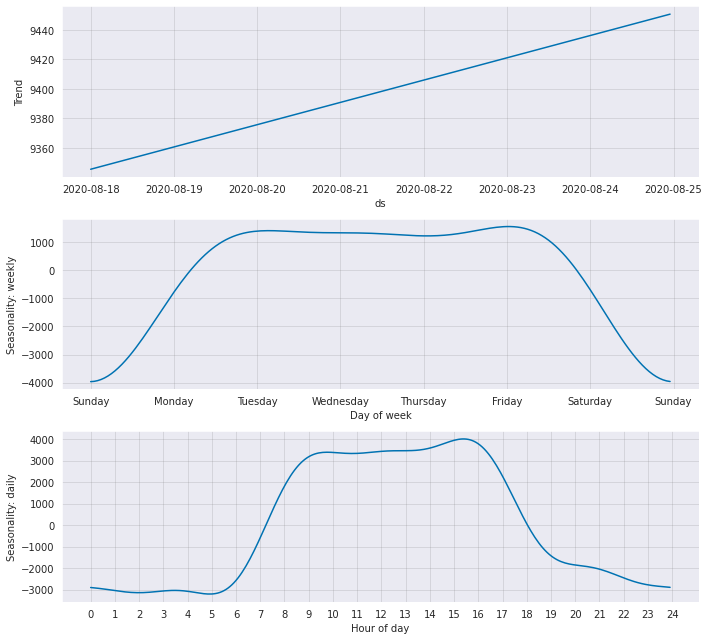

In [ ]:
model.plot_components(forecast)

실제 8번 건물의 8/18~8/24 데이터

In [ ]:
company8=df_train.loc[df_train['num']==8]
company8t=company8.loc[company8['month_day']>=818]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'hour')]

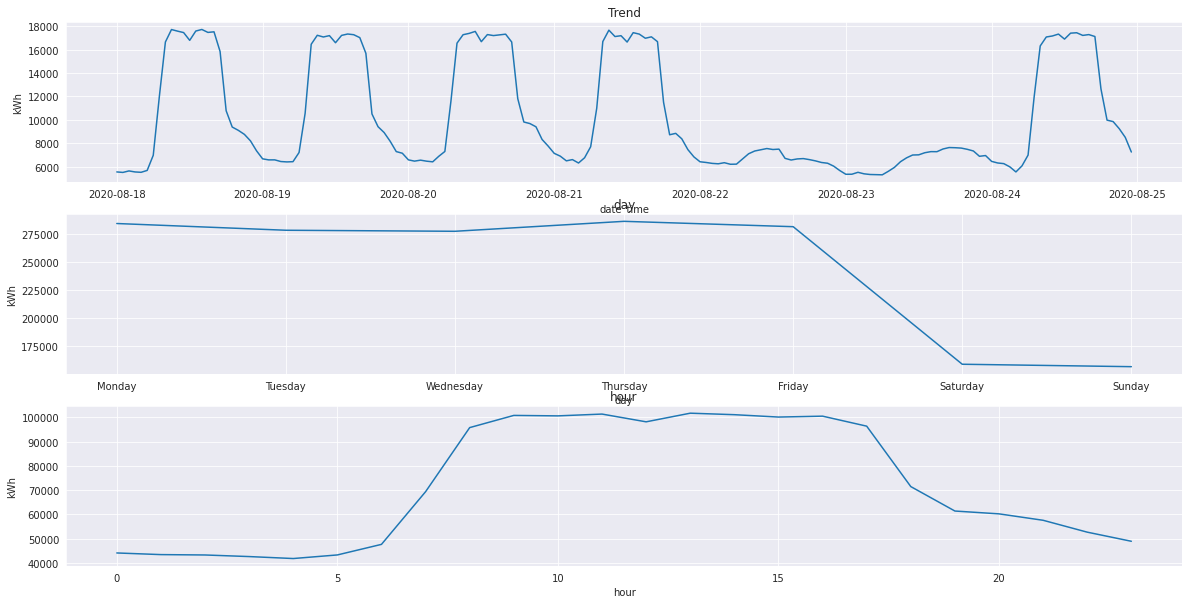

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,10)

md=company8t.groupby('date_time')['전력사용량(kWh)'].sum().reset_index()
d=company8t.groupby('day')['전력사용량(kWh)'].sum().reset_index()
h=company8t.groupby('hour')['전력사용량(kWh)'].sum().reset_index()

sns.lineplot(data=md, x="date_time", y='전력사용량(kWh)', ax=ax1)

sns.lineplot(data=d, x="day", y='전력사용량(kWh)', ax=ax2)

sns.lineplot(data=h, x="hour", y='전력사용량(kWh)', ax=ax3)

sns.set_style("darkgrid")
ax1.set(ylabel='kWh', title ="Trend")

ax2.set(ylabel='kWh', title ="day")

ax3.set(ylabel='kWh', title ="hour")

모델이 분석한 8번 건물의 8/18 이전 데이터

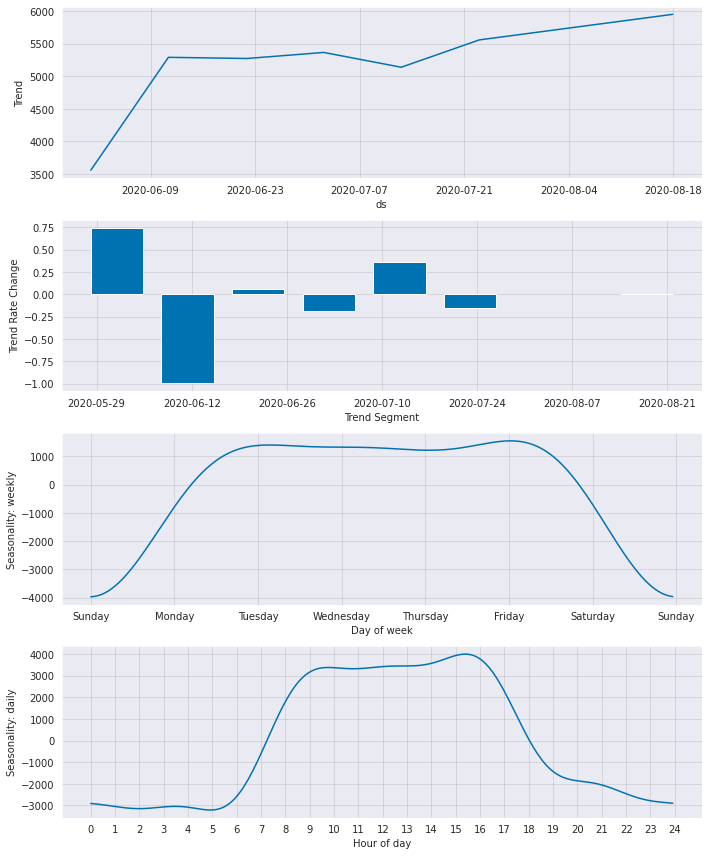

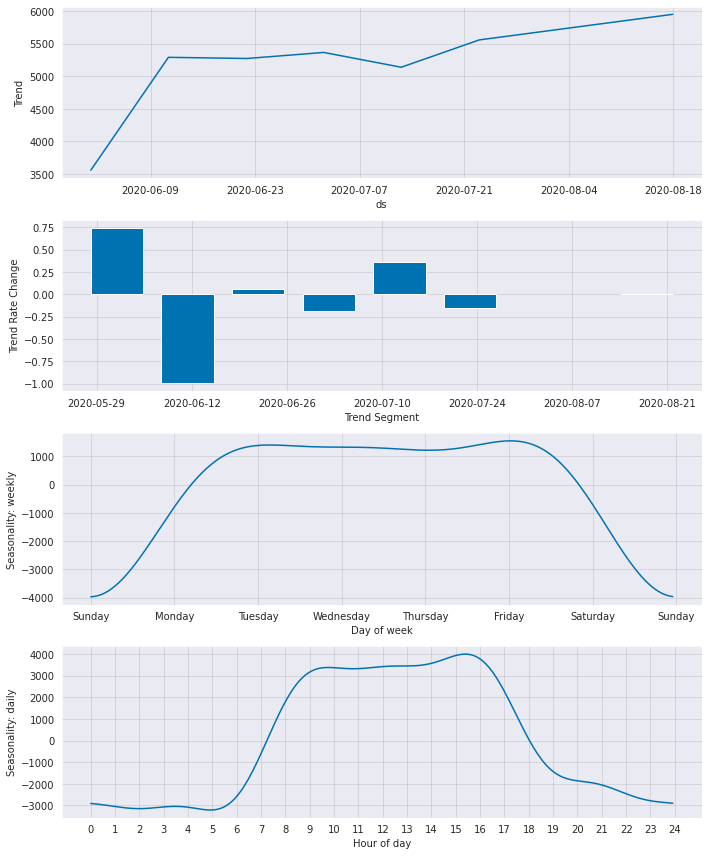

In [ ]:
model.plot_parameters()

실제 8번 건물의 8/18일 이전 데이터

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'hour')]

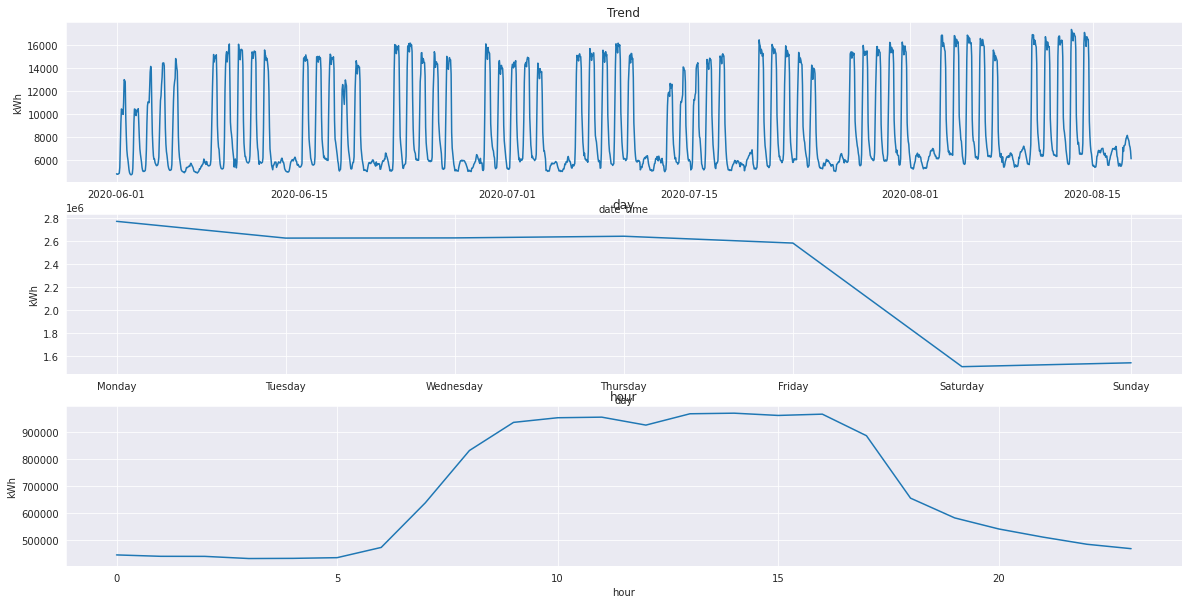

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

company8p=company8.loc[company8['month_day']<818]

figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,10)

md=company8p.groupby('date_time')['전력사용량(kWh)'].sum().reset_index()
d=company8p.groupby('day')['전력사용량(kWh)'].sum().reset_index()
h=company8p.groupby('hour')['전력사용량(kWh)'].sum().reset_index()

sns.lineplot(data=md, x="date_time", y='전력사용량(kWh)', ax=ax1)

sns.lineplot(data=d, x="day", y='전력사용량(kWh)', ax=ax2)

sns.lineplot(data=h, x="hour", y='전력사용량(kWh)', ax=ax3)

sns.set_style("darkgrid")
ax1.set(ylabel='kWh', title ="Trend")

ax2.set(ylabel='kWh', title ="day")

ax3.set(ylabel='kWh', title ="hour")

하이퍼 파라미터 적용하기
--

훈련/검증에 사용되는 데이터:
1. validate_each_epoch— 각 시기의 유효성 검사 데이터에 대한 모델 성능을 검증할지 여부를 나타내는 플래그이다.

2. valid_p — 유효성 검사에 사용해야 하는 데이터의 비율을 나타내는 0과 1 사이의 플로트이다.

3. plot_live_loss - 모델의 훈련 및 검증 손실에 대한 라이브 플롯 생성 여부를 나타내는 플래그이다.

4. epochs — 모델이 훈련되어야 하는 에포크 수이다.

하이퍼 파라미터

1. n_changepoints — 데이터의 광범위한 트렌드(증가율)가 변화하는  포인트 수를 지정한다.

2. trend_reg - 변경 지점 선택의 유연성을 제어하는 정규화 파라미터. 값이 클수록(0.001–100)
 변경 지점의 변동성이 제한된다. 값이 작을수록(~0.001–1.0) 변경 지점의 변동성이 커진다.

hyper ver 1.
--

default

params_grid=

{'n_changepoints':[1,10,12],

'trend_reg':[0.1,0.6,1.0],

'weekly_seasonality':[30,33,35],

'learning_rate':[0.01]},

valid_p=0.1, validate_each_epoch=True, plot_live_loss=True, epochs=10



In [ ]:
pip install livelossplot

In [ ]:
import numpy as np
def smape(a, f):
    return 1/len(a)*np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)

In [ ]:
#target_2=fb_train_te.loc[fb_train_te['num']==2]

In [ ]:
#from sklearn.model_selection import ParameterGrid
#from sklearn.model_selection import GridSearchCV
#
#params_grid={'n_changepoints':[10,12,20],
#             'trend_reg':[0.1,0.6],
#             'weekly_seasonality':[30,33,35],
#             'learning_rate':[0.01,0.05]},
# 후: {'n_changepoints': 12, 'trend_reg': 0.6, 'weekly_seasonality': 32}
#grid=ParameterGrid(params_grid)
#print([p for p in grid])

In [ ]:
#cnt=0
#for p in grid:
#    cnt=cnt+1
#print(cnt)

In [ ]:
#best_parameters=pd.DataFrame(columns=['NUM','SMAPE','n_changepoints','trend_reg',
#                                      'weekly_seasonality','learning_rate'])
#
#for i in range(1,61):
#    fb_1=fb_train_tn.loc[fb_train_tn['num']==i]
#    fb_2=fb_1.drop(['num','month_day'], axis=1)
#    fb_3=fb_train_te.loc[fb_train_te['num']==i]
#    model_parameters=pd.DataFrame(columns=['NUM','SMAPE','n_changepoints','trend_reg',
#                                      'weekly_seasonality','learning_rate'])
#
#    for p in grid:
#        test=pd.DataFrame()
#        print(p)
#        train_model=NeuralProphet(n_changepoints=p['n_changepoints'], 
#                              seasonality_mode='multiplicative',
#                              trend_reg=p['trend_reg'],
#                              weekly_seasonality=p['weekly_seasonality'],
#                              learning_rate=p['learning_rate'])
#        
#        train_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#        train_model.add_country_holidays(country_name='KR')
#        
#        train_model.fit(fb_2, valid_p=0.1, validate_each_epoch=True, plot_live_loss=True,epochs=100, freq='H')
#        train_future=train_model.make_future_dataframe(fb_2, periods=168)
#        train_forecast=train_model.predict(train_future)
#        test=train_forecast[['ds','yhat1']]
#        Actual=fb_3['y']
#        
#        y_true=np.array(Actual)
#        y_pred=np.array((test['yhat1']))
#
#        score=smape(y_true, y_pred)
#
#        model_parameters=model_parameters.append({'NUM':i, 'SMAPE':score,
#                                                  'n_changepoints':p['n_changepoints'],
#                                                  'trend_reg':p['trend_reg'],
#                                                  'weekly_seasonality':p['weekly_seasonality'],
#                                                  'learning_rate':p['learning_rate']}, ignore_index=True)
#
#    parameters = model_parameters.sort_values(by=['SMAPE'])
#    parameters = parameters.reset_index(drop=True)
#    best_parameters=best_parameters.append({'NUM':parameters['NUM'][0],
#                                            'SMAPE':parameters['SMAPE'][0],
#                                            'n_changepoints':parameters['n_changepoints'][0],
#                                            'trend_reg':parameters['trend_reg'][0],
#                                            'weekly_seasonality':parameters['weekly_seasonality'][0],
#                                            'learning_rate':parameters['learning_rate'][0]}, ignore_index=True)
#    i+=1

In [ ]:
#best_parameters

In [ ]:
#best_parameters.to_csv('best_parameters.csv', index=False)

In [ ]:
#best_parameters

SMAPE 점수가 높은 건물들 하이퍼 파라미터 재수정 해주기
--

ver1. 
params_grid

'n_changepoints':[10,12,20]
             
'trend_reg':[0.1,0.6]
             
'weekly_seasonality':[30,33,35]

'learning_rate':[0.01,0.05]

In [ ]:
best_parameters=pd.read_csv('best_parameters.csv', encoding='cp949')
best_parametrs=pd.DataFrame(best_parameters)
best_parameters

,NUM,SMAPE,n_changepoints,trend_reg,weekly_seasonality,learning_rate
0,1.0,0.592670,10.0,0.1,30.0,0.01
1,2.0,2.520215,20.0,0.6,35.0,0.05
2,3.0,3.049711,20.0,0.6,33.0,0.01
3,4.0,21.799494,20.0,0.1,30.0,0.01
4,5.0,7.593745,10.0,0.6,33.0,0.01
5,6.0,8.545268,20.0,0.1,30.0,0.01
6,7.0,11.018372,10.0,0.6,35.0,0.05
7,8.0,5.919134,12.0,0.1,30.0,0.01
8,9.0,2.498820,12.0,0.1,33.0,0.01
9,10.0,12.999640,12.0,0.6,30.0,0.05


In [ ]:
bad=best_parameters.loc[best_parameters['SMAPE']>=10]
bad

,NUM,SMAPE,n_changepoints,trend_reg,weekly_seasonality,learning_rate
3,4.0,21.799494,20.0,0.1,30.0,0.01
6,7.0,11.018372,10.0,0.6,35.0,0.05
9,10.0,12.999640,12.0,0.6,30.0,0.05
10,11.0,10.377436,10.0,0.1,35.0,0.05
17,18.0,12.335146,20.0,0.1,35.0,0.05
18,19.0,11.816321,12.0,0.6,30.0,0.05
22,23.0,10.826803,10.0,0.1,30.0,0.01
26,27.0,15.501854,20.0,0.1,33.0,0.05
33,34.0,10.157091,12.0,0.1,33.0,0.05
34,35.0,10.486281,20.0,0.1,33.0,0.01


In [ ]:
bad.sort_values(by='SMAPE', ascending=False)

,NUM,SMAPE,n_changepoints,trend_reg,weekly_seasonality,learning_rate
3,4.0,21.799494,20.0,0.1,30.0,0.01
55,56.0,17.719958,10.0,0.1,30.0,0.01
26,27.0,15.501854,20.0,0.1,33.0,0.05
47,48.0,14.066613,10.0,0.1,35.0,0.01
9,10.0,12.999640,12.0,0.6,30.0,0.05
17,18.0,12.335146,20.0,0.1,35.0,0.05
39,40.0,12.103395,20.0,0.6,33.0,0.05
18,19.0,11.816321,12.0,0.6,30.0,0.05
58,59.0,11.776032,12.0,0.1,35.0,0.01
41,42.0,11.212887,20.0,0.6,35.0,0.01


SMAPE 점수가 10점 이상인 건물은

[7],[11],[18],[42],[48],[50],[59],[27],[34],[35],[40],[4],[10],[19],[23],[56]

* [  ]는 수정이 다 이루어진 건물 번호

주어진 params

n_changepoints':[10,12,20]

'trend_reg':[0.1,0.6]

'weekly_seasonality':[30,33,35]

'learning_rate':[0.01,0.05]



 num/smape/n_changepoints/trend_red/weekly_seasinality/learning_rate

4번 건물	
4.0	19.532101	30.0	0.6	30.0	0.05

18번 건물

18.0	11.744302	40.0	0.1	38.0	0.05

23번 건물

23.0	10.588655	13.0	0.1	25.0	0.05

7번 건물

7.0	10.674829	5.0	0.6	35.0	0.05

11번 건물

11.0	10.013347	3.0	0.6	35.0	0.05

48번 건물

48.0	10.555850	5.0	0.1	40.0	0.01

42번 건물

42.0	10.777431	25.0	0.6	34.0	0.05

50번 건물

50.0	10.407412	12.0	0.6	35.0	0.05

59번 건물

50.0	11.794894	12.0	0.1	35.0	0.05

27번 건물 pass

34번 건물

34.0	9.94671	25.0	0.1	30.0	0.05

35번 건물 pass

40번 건물

40.0	10.848572	20.0	0.6	35.0	0.01

10번 건물 pass

19번 건물

19.0	12.986787	12.0	0.6	25.0	0.05

56번 건물

56.0	9.178761	7.0	0.1	30.0	0.05


In [ ]:
#import numpy as np
#def smape(a, f):
#    return 1/len(a)*np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)

In [ ]:
#from sklearn.model_selection import ParameterGrid
#from sklearn.model_selection import GridSearchCV
#
#params_grid={'n_changepoints':[5,7,10],
#             'trend_reg':[0.1,0.6],
#             'weekly_seasonality':[25,27,30],
#             'learning_rate':[0.01,0.05]},
#
#grid=ParameterGrid(params_grid)
#print([p for p in grid])
#
#n_changepoints':[10,12,20]
#'trend_reg':[0.1,0.6]
#'weekly_seasonality':[30,33,35]
#'learning_rate':[0.01,0.05]

In [ ]:
#cnt=0
#for p in grid:
#    cnt=cnt+1
#print(cnt)

In [ ]:
#fb_1=fb_train_tn.loc[fb_train_tn['num']==56]
#fb_2=fb_1.drop(['num'], axis=1)
#fb_3=fb_train_te.loc[fb_train_te['num']==56]
#model_parameters=pd.DataFrame(columns=['NUM','SMAPE','n_changepoints','trend_reg',
#                                      'weekly_seasonality','learning_rate'])
#
#for p in grid:
#    test=pd.DataFrame()
#    print(p)
#    train_model=NeuralProphet(n_changepoints=p['n_changepoints'], 
#                              seasonality_mode='multiplicative',
#                              trend_reg=p['trend_reg'],
#                              weekly_seasonality=p['weekly_seasonality'],
#                              learning_rate=p['learning_rate'])
#        
#    train_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#    train_model.add_country_holidays(country_name='KR')
#        
#    train_model.fit(fb_2, valid_p=0.1, validate_each_epoch=True, plot_live_loss=True,epochs=10, freq='H')
#    train_future=train_model.make_future_dataframe(fb_2, periods=168)
#    train_forecast=train_model.predict(train_future)
#    test=train_forecast[['ds','yhat1']]
#    Actual=fb_3['y']
#        
#    y_true=np.array(Actual)
#    y_pred=np.array((test['yhat1']))
#
#    score=smape(y_true, y_pred)
#
#    model_parameters=model_parameters.append({'NUM':56, 'SMAPE':score,
#                                                  'n_changepoints':p['n_changepoints'],
#                                                  'trend_reg':p['trend_reg'],
#                                                  'weekly_seasonality':p['weekly_seasonality'],
#                                                  'learning_rate':p['learning_rate']}, ignore_index=True)

In [ ]:
#parameters = model_parameters.sort_values(by=['SMAPE'])
#parameters = parameters.reset_index(drop=True)
#parameters.head()

In [ ]:
#parameters.iloc[0][1]

In [ ]:
#best_parameters.iloc[55]

In [ ]:
#best_parameters.iloc[55][1]=parameters.iloc[0][1]
#best_parameters.iloc[55][2]=parameters.iloc[0][2]
#best_parameters.iloc[55][3]=parameters.iloc[0][3]
#best_parameters.iloc[55][4]=parameters.iloc[0][4]
#best_parameters.iloc[55][5]=parameters.iloc[0][5]

In [ ]:
#best_parameters.loc[best_parameters['NUM']==56]

In [ ]:
#best_parameters.sort_values(by='SMAPE', ascending=False)

In [ ]:
#best_parameters.to_csv('best_parameters2.csv', index=False)

60개 건물에 적용하여 train데이터를 train과 test로 분리하여 rmse 구하기
--

rmse 는  365.2987927341772 입니다.

smape는 5.667479184145101 입니다.

In [ ]:
best_parameters2=pd.read_csv('best_parameters2.csv', encoding='cp949')
best_parametrs2=pd.DataFrame(best_parameters2)
best_parameters2

,NUM,SMAPE,n_changepoints,trend_reg,weekly_seasonality,learning_rate
0,1.0,0.592670,10.0,0.1,30.0,0.01
1,2.0,2.520215,20.0,0.6,35.0,0.05
2,3.0,3.049711,20.0,0.6,33.0,0.01
3,4.0,19.532101,30.0,0.6,30.0,0.05
4,5.0,7.593745,10.0,0.6,33.0,0.01
5,6.0,8.545268,20.0,0.1,30.0,0.01
6,7.0,10.674829,5.0,0.6,35.0,0.05
7,8.0,5.919134,12.0,0.1,30.0,0.01
8,9.0,2.498820,12.0,0.1,33.0,0.01
9,10.0,12.999640,12.0,0.6,30.0,0.05


In [ ]:
best_parameters2.iloc[0][1]

0.5926703660067723

In [ ]:
best_parameters['SMAPE'].mean()

7.218073244444903

In [ ]:
best_parameters2['SMAPE'].mean()

6.946075561760085

In [ ]:
answer=[]

for i in range(1,61):
    fb_1=fb_train_tn.loc[fb_train_tn['num']==i]
    fb_2=fb_1.drop(['num'], axis=1)
    model=NeuralProphet(n_changepoints=int(best_parameters2.iloc[i-1][2]), 
                        seasonality_mode='multiplicative',
                        trend_reg=best_parameters2.iloc[i-1][3],
                        weekly_seasonality=int(best_parameters2.iloc[i-1][4]),
                        learning_rate=best_parameters2.iloc[i-1][5])
              
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_country_holidays(country_name='KR')
    model.fit(fb_2, validate_each_epoch=True, valid_p=0.1, freq='H', epochs=100)
    future=model.make_future_dataframe(fb_2, periods=168)
    forecast=model.predict(future)
    pred=forecast['yhat1']
    answer.append(pred)
    i+=1


# plot_live_loss=True,
# 전: {'n_changepoints': 12, 'trend_reg': 0.6, 'weekly_seasonality': 34}
# 후: {'n_changepoints': 12, 'trend_reg': 0.6, 'weekly_seasonality': 32}

In [ ]:
import numpy as np

answer2=pd.DataFrame(answer)
answer3=np.array(answer2)
answer4=answer3.reshape(-1,1)
answer5=pd.DataFrame(answer4)

In [ ]:
df_sample_submission['answer']=answer5[0]

In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred=df_sample_submission['answer']
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))

score=smape(y_test, y_test_pred)

print('smape는', format(score), '입니다.')
print('rmse 는', format(rmse), '입니다.')

# 전 rmse: 434.4833387560815
# 후 rmse: 369.19372
# last rmse: 365,2987

smape는 5.667479184145101 입니다.
rmse 는 350.9959772905544 입니다.


Using AR-Net
--

smape는 5.5647547168221445 입니다.

rmse 는 481.0119023744138 입니다.

In [ ]:
fb_train_te

,num,month_day,ds,y
1872,1,818,2020-08-18 00:00:00,8690.976
1873,1,818,2020-08-18 01:00:00,8672.184
1874,1,818,2020-08-18 02:00:00,8645.616
1875,1,818,2020-08-18 03:00:00,8583.408
1876,1,818,2020-08-18 04:00:00,8562.672
...,...,...,...,...
122395,60,824,2020-08-24 19:00:00,4114.368
122396,60,824,2020-08-24 20:00:00,3975.696
122397,60,824,2020-08-24 21:00:00,3572.208
122398,60,824,2020-08-24 22:00:00,3299.184


In [ ]:
best_parameters2.head()

,NUM,SMAPE,n_changepoints,trend_reg,weekly_seasonality,learning_rate
0,1.0,0.592670,10.0,0.1,30.0,0.01
1,2.0,2.520215,20.0,0.6,35.0,0.05
2,3.0,3.049711,20.0,0.6,33.0,0.01
3,4.0,19.532101,30.0,0.6,30.0,0.05
4,5.0,7.593745,10.0,0.6,33.0,0.01


In [ ]:
answer=[]

for i in range(1,61):
    fb_1=fb_train_tn.loc[fb_train_tn['num']==i]
    fb_2=fb_1.drop(['num'], axis=1)
    model=NeuralProphet(n_forecasts=168, n_lags=168,
                        n_changepoints=int(best_parameters2.iloc[i-1][2]), 
                        seasonality_mode='multiplicative',
                        trend_reg=best_parameters2.iloc[i-1][3],
                        weekly_seasonality=int(best_parameters2.iloc[i-1][4]),
                        learning_rate=best_parameters2.iloc[i-1][5],
                        batch_size=1)
              
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_country_holidays(country_name='KR')
    model.fit(fb_2, freq='H', validate_each_epoch=True, valid_p=0.1 )
    future=model.make_future_dataframe(fb_2, periods=168)
    forecast=model.predict(future)
    pred=forecast['y']
    answer.append(pred)
    i+=1

#epochs=100

In [ ]:
answer2=pd.DataFrame(answer)
answer3=answer2.dropna(axis=1)
answer4=np.array(answer3)
answer5=answer4.reshape(-1,1)
answer6=pd.DataFrame(answer5)

In [ ]:
answer6

,0
0,8617.752
1,8612.568
2,8585.352
3,8596.368
4,8571.096
...,...
10075,4261.248
10076,4202.064
10077,4036.608
10078,3850.416


In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred=answer6[0]
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))

score=smape(y_test, y_test_pred)

print('smape는', format(score), '입니다.')
print('rmse 는', format(rmse), '입니다.')

# 전 rmse: 434.4833387560815
# 후 rmse: 369.19372
# last rmse: 365,2987

smape는 5.5647547168221445 입니다.
rmse 는 481.0119023744138 입니다.


모델 시각화
--

In [ ]:
fb_8=fb_train_tn.loc[fb_train_tn['num']==8]
fb_81=fb_8.drop(['num'], axis=1)
model=NeuralProphet(n_changepoints=12, 
                        seasonality_mode='multiplicative',
                        trend_reg=0.1,
                        weekly_seasonality=30,
                        learning_rate=0.01)
model.fit(fb_81,validate_each_epoch=True, valid_p=0.1, freq='H', plot_live_loss=True, epochs=100)
future=model.make_future_dataframe(fb_81, periods=168)
forecast=model.predict(future)

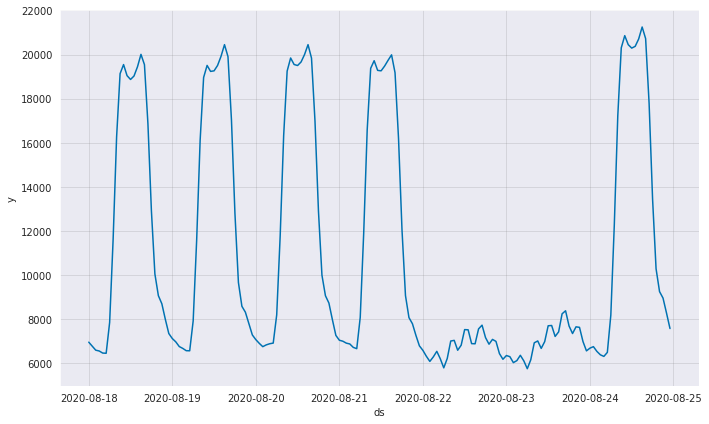

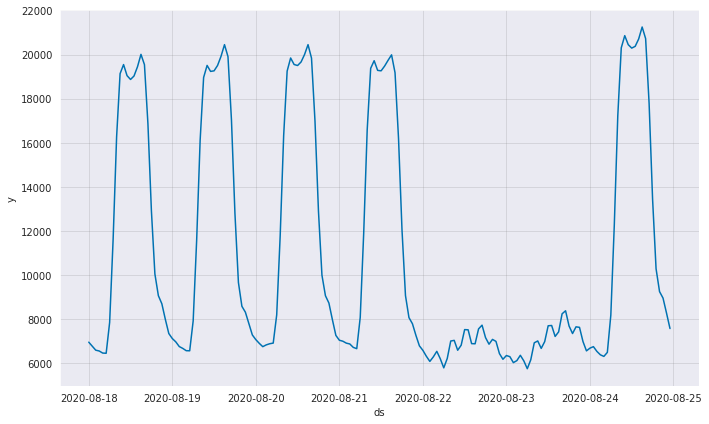

In [ ]:
model.plot(forecast)

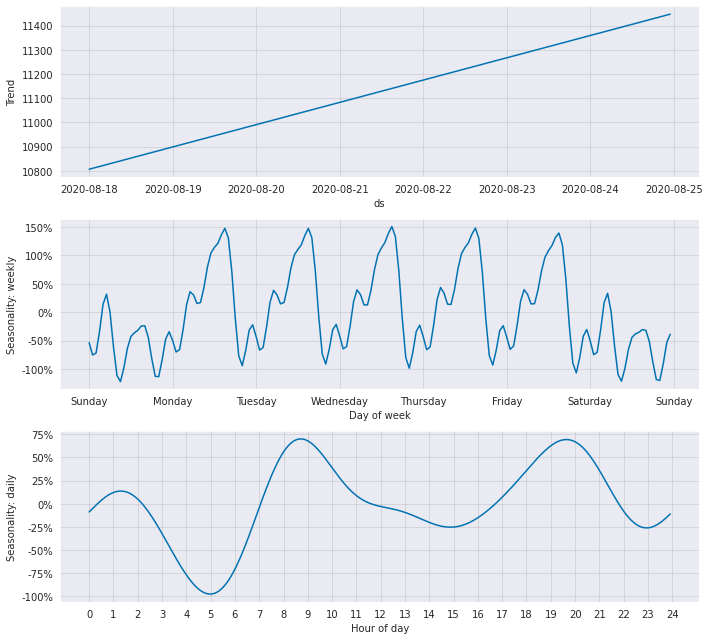

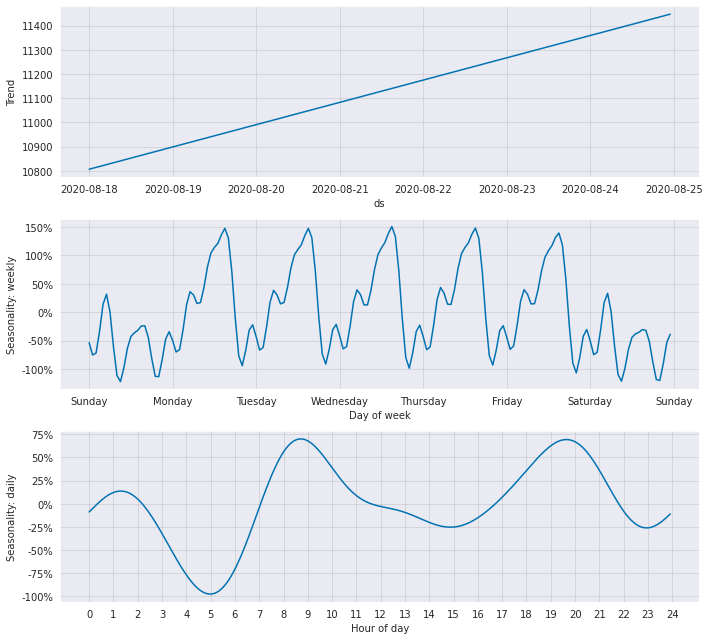

In [ ]:
model.plot_components(forecast)

가장 좋은 모델에 실제 Train데이터를 적용하여 1번 건물부터 60번 건물까지 answer 리스트에 추가해줍니다.
--

submission 파일에 적용준비
--

fbprophet 적용 version
--

In [ ]:
fb_train.drop(['month_day'], axis=1, inplace=True)

In [ ]:
fb_train

,num,ds,y
0,1,2020-06-01 00:00:00,8179.056
1,1,2020-06-01 01:00:00,8135.640
2,1,2020-06-01 02:00:00,8107.128
3,1,2020-06-01 03:00:00,8048.808
4,1,2020-06-01 04:00:00,8043.624
...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368
122396,60,2020-08-24 20:00:00,3975.696
122397,60,2020-08-24 21:00:00,3572.208
122398,60,2020-08-24 22:00:00,3299.184


In [ ]:
answer=[]

for i in range(1,61):
    fb_1=fb_train.loc[fb_train['num']==i]
    model = Prophet(growth="linear", changepoints=None, seasonality_mode="multiplicative", 
                    changepoint_range=fb_parameters.iloc[i-1][2],
                    changepoint_prior_scale=fb_parameters.iloc[i-1][3],
                    weekly_seasonality=int(fb_parameters.iloc[i-1][4]))
    # Specifying Custom Seasonalities
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_country_holidays(country_name='KR')
    
    model.fit(fb_1, algorithm='LBFGS')
    future=model.make_future_dataframe(periods=168, freq='H')
    forecast=model.predict(future)

    pred=forecast['yhat']
    answer.append(pred)
    i+=1

In [ ]:
import numpy as np

answer2=pd.DataFrame(answer)
answer3=answer2.iloc[:, 2040:2208]
answer4=np.array(answer3)
answer5=answer4.reshape(-1,1)
answer6=pd.DataFrame(answer5)

In [ ]:
df_sample_submission['answer']=answer6[0]

In [ ]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,8547.141961
1,1 2020-08-25 01,8523.603001
2,1 2020-08-25 02,8508.660675
3,1 2020-08-25 03,8493.424390
4,1 2020-08-25 04,8471.309051
...,...,...
10075,60 2020-08-31 19,3851.550472
10076,60 2020-08-31 20,3760.693642
10077,60 2020-08-31 21,3629.206041
10078,60 2020-08-31 22,3474.111644


In [ ]:
submission531 = df_sample_submission['num_date_time']
submission531 = {"num_date_time":df_sample_submission["num_date_time"],"answer":df_sample_submission['answer']}
submission531 = pd.DataFrame(submission531)
submission531.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  10080 non-null  object 
 1   answer         10080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.6+ KB


In [ ]:
submission531.to_csv('submission531.csv', index=False)

Neural Prophet hyper 적용 version
--

In [ ]:
fb_train

,num,ds,y
0,1,2020-06-01 00:00:00,8179.056
1,1,2020-06-01 01:00:00,8135.640
2,1,2020-06-01 02:00:00,8107.128
3,1,2020-06-01 03:00:00,8048.808
4,1,2020-06-01 04:00:00,8043.624
...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368
122396,60,2020-08-24 20:00:00,3975.696
122397,60,2020-08-24 21:00:00,3572.208
122398,60,2020-08-24 22:00:00,3299.184


In [ ]:
best_parameters2.head()

,NUM,SMAPE,n_changepoints,trend_reg,weekly_seasonality,learning_rate
0,1.0,0.592670,10.0,0.1,30.0,0.01
1,2.0,2.520215,20.0,0.6,35.0,0.05
2,3.0,3.049711,20.0,0.6,33.0,0.01
3,4.0,19.532101,30.0,0.6,30.0,0.05
4,5.0,7.593745,10.0,0.6,33.0,0.01


In [ ]:
answer=[]

for i in range(1,61):
    fb_1=fb_train.loc[fb_train['num']==i]
    fb_2=fb_1.drop(['num'], axis=1)
    model=NeuralProphet(n_changepoints=int(best_parameters2.iloc[i-1][2]), 
                        seasonality_mode='multiplicative',
                        trend_reg=best_parameters2.iloc[i-1][3],
                        weekly_seasonality=int(best_parameters2.iloc[i-1][4]),
                        learning_rate=best_parameters2.iloc[i-1][5])
    
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_country_holidays(country_name='KR')

    model.fit(fb_2, validate_each_epoch=True, valid_p=0.1, freq='H', plot_live_loss=True, epochs=100)
    future=model.make_future_dataframe(fb_2, periods=168)
    forecast=model.predict(future)
    pred=forecast['yhat1']
    answer.append(pred)
    i+=1

In [ ]:
import numpy as np

answer2=pd.DataFrame(answer)
answer3=np.array(answer2)
answer4=answer3.reshape(-1,1)
answer5=pd.DataFrame(answer4)

In [ ]:
df_sample_submission['answer']=answer5[0]

In [ ]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,8771.452148
1,1 2020-08-25 01,8740.079102
2,1 2020-08-25 02,8725.458008
3,1 2020-08-25 03,8707.672852
4,1 2020-08-25 04,8674.038086
...,...,...
10075,60 2020-08-31 19,3925.438477
10076,60 2020-08-31 20,3842.793457
10077,60 2020-08-31 21,3724.225586
10078,60 2020-08-31 22,3562.935059


In [ ]:
submission530 = df_sample_submission['num_date_time']
submission530 = {"num_date_time":df_sample_submission["num_date_time"],"answer":df_sample_submission['answer']}
submission530= pd.DataFrame(submission530)
submission530.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  10080 non-null  object 
 1   answer         10080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.6+ KB


In [ ]:
#submission530.to_csv('submission530.csv', index=False)

AR-Net 적용
--

In [ ]:
answer=[]

for i in range(1,61):
    fb_1=fb_train_tn.loc[fb_train['num']==i]
    fb_2=fb_1.drop(['num'], axis=1)
    model=NeuralProphet(n_forecasts=168, n_lags=168,
                        n_changepoints=int(best_parameters2.iloc[i-1][2]), 
                        seasonality_mode='multiplicative',
                        trend_reg=best_parameters2.iloc[i-1][3],
                        weekly_seasonality=int(best_parameters2.iloc[i-1][4]),
                        learning_rate=best_parameters2.iloc[i-1][5],
                        batch_size=1,
                        epochs=100)
              
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_country_holidays(country_name='KR')
    model.fit(fb_2, freq='H', validate_each_epoch=True, valid_p=0.1 )
    future=model.make_future_dataframe(fb_2, periods=168)
    forecast=model.predict(future)
    pred=forecast['y']
    answer.append(pred)
    i+=1

In [ ]:
answer2=pd.DataFrame(answer)
answer3=answer2.dropna(axis=1)
answer4=np.array(answer3)
answer5=answer4.reshape(-1,1)
answer6=pd.DataFrame(answer5)

In [ ]:
df_sample_submission['answer']=answer6[0]

In [ ]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,8617.752
1,1 2020-08-25 01,8612.568
2,1 2020-08-25 02,8585.352
3,1 2020-08-25 03,8596.368
4,1 2020-08-25 04,8571.096
...,...,...
10075,60 2020-08-31 19,4261.248
10076,60 2020-08-31 20,4202.064
10077,60 2020-08-31 21,4036.608
10078,60 2020-08-31 22,3850.416


In [ ]:
submission602 = df_sample_submission['num_date_time']
submission602 = {"num_date_time":df_sample_submission["num_date_time"],"answer":df_sample_submission['answer']}
submission602= pd.DataFrame(submission602)
submission602.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  10080 non-null  object 
 1   answer         10080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.6+ KB


In [ ]:
submission602.to_csv('submission602.csv', index=False)